## Dataset: Wisconsin Diagnostic breast cancer (Classification Problem) 

## Model Training

In [1]:
# import the pacakges
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pyplot import figure

# to show all the columns of the dataframe in the notebeook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.model_selection import (
    RepeatedStratifiedKFold, 
    cross_validate)

from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix,
    auc,
    roc_curve)

from feature_engine.encoding import OrdinalEncoder

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier

## Step 1: Data Transformation

### Preparing X and Y variables

In [2]:
from sklearn.datasets import load_breast_cancer

df_bc = load_breast_cancer() 
df_bc.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [3]:
data = np.c_[df_bc.data, df_bc.target]
column_names = np.append(df_bc.feature_names, ['malignant'])
df = pd.DataFrame(data, columns=column_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


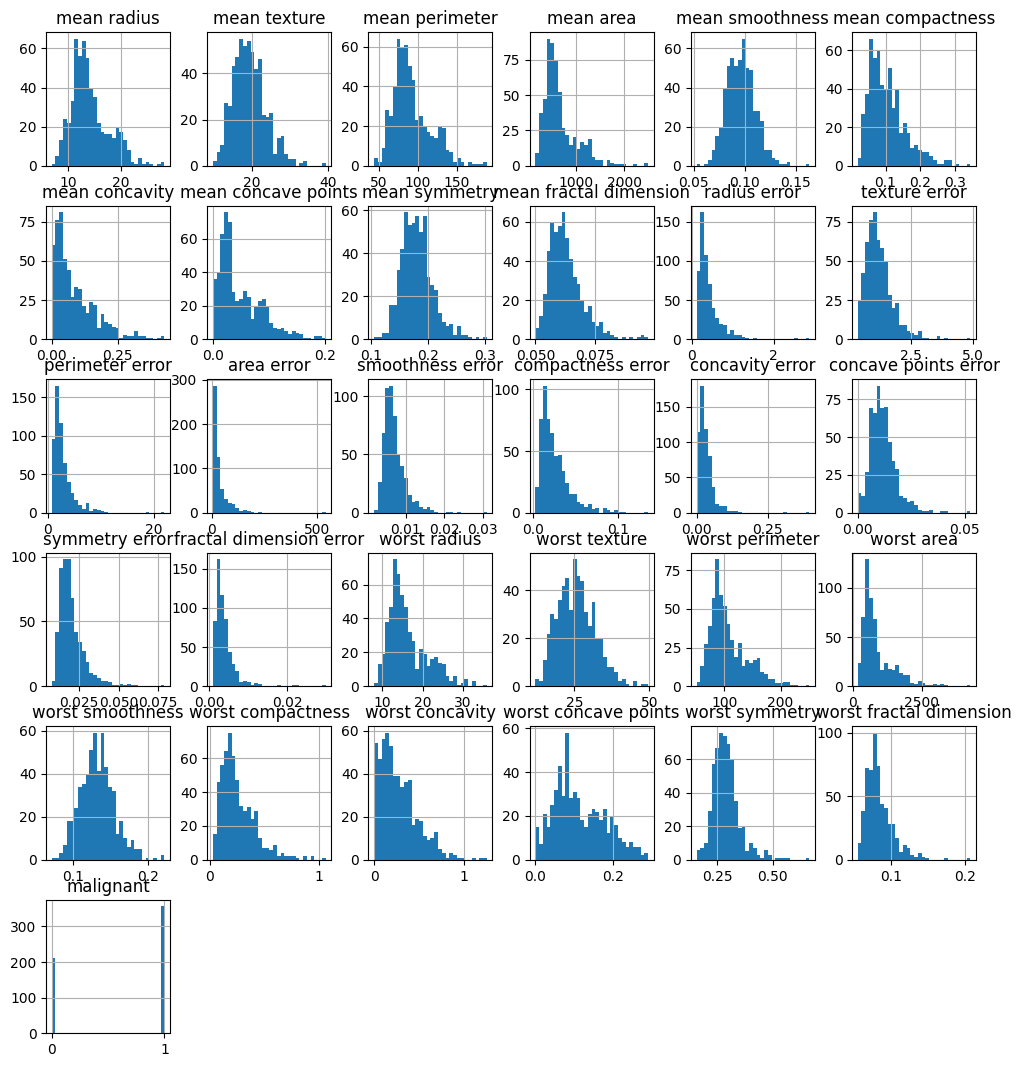

In [4]:
## some of the column distributions are normal whereas most of them are skewed to the left

num_cols = [n for n in df.columns if df[n].dtypes != "O"]

df[num_cols].hist(bins=30, figsize=(12,13))
plt.show()

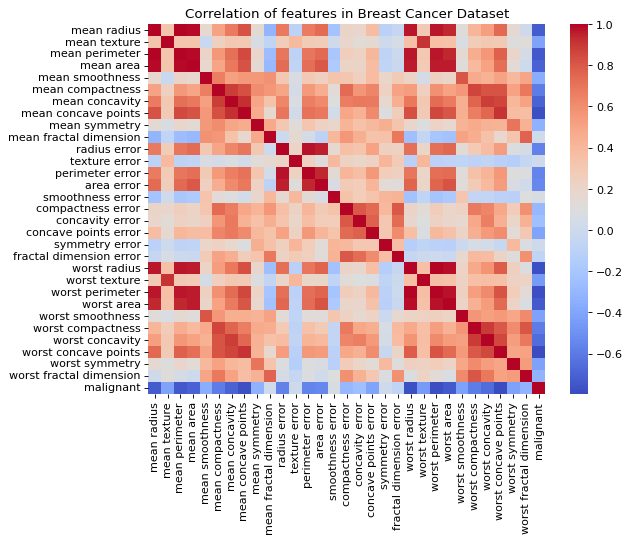

In [5]:
# Use correlation to check if there are features that are highly correlated to each other
figure(figsize=(8, 6), dpi=80)

plt.title("Correlation of features in Breast Cancer Dataset") # title name
sns.heatmap(df[num_cols].corr(), cmap = 'coolwarm') # generate a heatmap using sns.heatmap(df.corr(), cmap = 'coolwarm')
plt.show()

In [6]:
## Keep only relevant columns (based on domain knowledge of cancer indicatons) and drop those highly correlated or repeating columns

df = df.drop(columns = ['mean perimeter', 'mean area', 'worst radius', 'worst perimeter', 'worst area', 'fractal dimension error', 'mean fractal dimension','radius error',
                        'texture error', 'smoothness error', 'symmetry error', 'worst texture', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 
                        'worst symmetry', 'worst fractal dimension', 'perimeter error', 'area error', 'concavity error', 'concave points error', 'compactness error'])

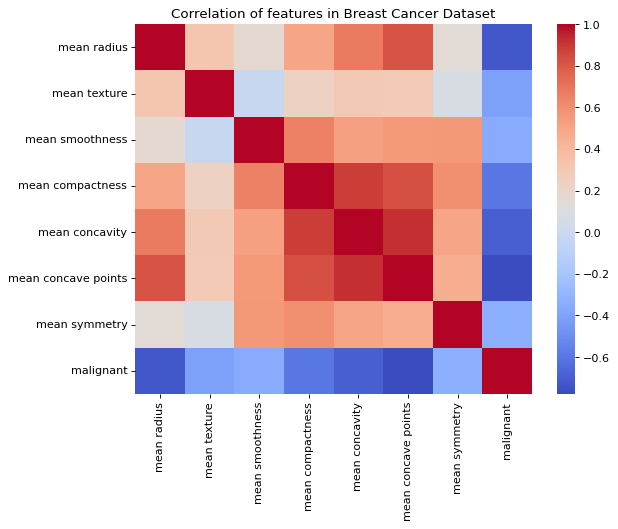

In [7]:
# Use correlation to check again if there are features that are highly correlated to each other

num_cols = [n for n in df.columns if df[n].dtypes != "O"]

figure(figsize=(8, 6), dpi=80)

plt.title("Correlation of features in Breast Cancer Dataset") # title name
sns.heatmap(df[num_cols].corr(), cmap = 'coolwarm') # generate a heatmap using sns.heatmap(df.corr(), cmap = 'coolwarm')
plt.show()

In [8]:
df.columns = df.columns.str.replace(' ', '_')
df

,mean_radius,mean_texture,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,malignant
0,17.99,10.38,0.11840,0.27760,0.30010,0.14710,0.2419,0.0
1,20.57,17.77,0.08474,0.07864,0.08690,0.07017,0.1812,0.0
2,19.69,21.25,0.10960,0.15990,0.19740,0.12790,0.2069,0.0
3,11.42,20.38,0.14250,0.28390,0.24140,0.10520,0.2597,0.0
4,20.29,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.0
...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.24390,0.13890,0.1726,0.0
565,20.13,28.25,0.09780,0.10340,0.14400,0.09791,0.1752,0.0
566,16.60,28.08,0.08455,0.10230,0.09251,0.05302,0.1590,0.0
567,20.60,29.33,0.11780,0.27700,0.35140,0.15200,0.2397,0.0


In [9]:
df['malignant'].value_counts()

malignant
1.0    357
0.0    212
Name: count, dtype: int64

In [10]:
df['malignant'] = df['malignant'].map(lambda x: 1 if x != 1.0 else 0)
df['malignant'].value_counts()

malignant
0    357
1    212
Name: count, dtype: int64

In [11]:
df.to_csv("./processed_data/cancer.csv", index = False)

In [12]:
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

In [13]:
X = df.drop(columns=['malignant'],axis=1)
X

,mean_radius,mean_texture,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry
0,17.99,10.38,0.11840,0.27760,0.30010,0.14710,0.2419
1,20.57,17.77,0.08474,0.07864,0.08690,0.07017,0.1812
2,19.69,21.25,0.10960,0.15990,0.19740,0.12790,0.2069
3,11.42,20.38,0.14250,0.28390,0.24140,0.10520,0.2597
4,20.29,14.34,0.10030,0.13280,0.19800,0.10430,0.1809
...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.24390,0.13890,0.1726
565,20.13,28.25,0.09780,0.10340,0.14400,0.09791,0.1752
566,16.60,28.08,0.08455,0.10230,0.09251,0.05302,0.1590
567,20.60,29.33,0.11780,0.27700,0.35140,0.15200,0.2397


In [14]:
X.columns

Index(['mean_radius', 'mean_texture', 'mean_smoothness', 'mean_compactness',
       'mean_concavity', 'mean_concave_points', 'mean_symmetry'],
      dtype='object')

In [15]:
X.describe()

,mean_radius,mean_texture,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,0.096360,0.104341,0.088799,0.048919,0.181162
std,3.524049,4.301036,0.014064,0.052813,0.079720,0.038803,0.027414
min,6.981000,9.710000,0.052630,0.019380,0.000000,0.000000,0.106000
25%,11.700000,16.170000,0.086370,0.064920,0.029560,0.020310,0.161900
50%,13.370000,18.840000,0.095870,0.092630,0.061540,0.033500,0.179200
75%,15.780000,21.800000,0.105300,0.130400,0.130700,0.074000,0.195700
max,28.110000,39.280000,0.163400,0.345400,0.426800,0.201200,0.304000


In [16]:
y = df['malignant']

In [17]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: malignant, Length: 569, dtype: int64

In [18]:
train_idx, test_idx = next(strat_shuff_split.split(X, y))

In [19]:
train_set = df.loc[train_idx]  
train_set

,mean_radius,mean_texture,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,malignant
78,20.18,23.97,0.12860,0.34540,0.37540,0.16040,0.2906,1
330,16.03,15.51,0.09491,0.13710,0.12040,0.07041,0.1782,1
378,13.66,15.15,0.08268,0.07548,0.04249,0.02471,0.1792,0
213,17.42,25.56,0.10060,0.11460,0.16820,0.06597,0.1308,1
89,14.64,15.24,0.11320,0.13390,0.09966,0.07064,0.2116,0
...,...,...,...,...,...,...,...,...
37,13.03,18.42,0.08983,0.03766,0.02562,0.02923,0.1467,0
415,11.89,21.17,0.09773,0.08120,0.02555,0.02179,0.2019,0
458,13.00,25.13,0.08369,0.05073,0.01206,0.01762,0.1667,0
476,14.20,20.53,0.08931,0.11080,0.05063,0.03058,0.1506,0


In [20]:
test_set = df.loc[test_idx]
test_set

,mean_radius,mean_texture,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,malignant
448,14.53,19.34,0.08388,0.07800,0.08817,0.029250,0.1473,0
346,12.06,18.90,0.08386,0.05794,0.00751,0.008488,0.1555,0
568,7.76,24.54,0.05263,0.04362,0.00000,0.000000,0.1587,0
411,11.04,16.83,0.10770,0.07804,0.03046,0.024800,0.1714,0
519,12.75,16.70,0.11250,0.11170,0.03880,0.029950,0.2120,0
...,...,...,...,...,...,...,...,...
74,12.31,16.52,0.09172,0.06829,0.03372,0.022720,0.1720,0
39,13.48,20.82,0.10160,0.12550,0.10630,0.054390,0.1720,1
99,14.42,19.77,0.09752,0.11410,0.09388,0.058390,0.1879,1
115,11.93,21.53,0.09768,0.07849,0.03328,0.020080,0.1688,0


In [21]:
target_column_name="malignant"

input_feature_train_df=train_set.drop(columns=[target_column_name],axis=1)
target_feature_train_df=train_set[target_column_name]

In [22]:
input_feature_test_df=test_set.drop(columns=[target_column_name],axis=1)
target_feature_test_df=test_set[target_column_name]

In [23]:
# Create Column Transformer with 3 types of transformers
numerical_columns = X.select_dtypes(exclude="object").columns
categorical_columns = X.select_dtypes(include="object").columns

num_pipeline= Pipeline(
                steps=[ 
                        ("scaler",StandardScaler())
                      ]
                    )
                                    
preprocessor=ColumnTransformer(
                [
                    ("num_pipeline",num_pipeline,numerical_columns),
                ]
                            )

In [24]:
input_feature_train_arr=preprocessor.fit_transform(input_feature_train_df)
input_feature_test_arr=preprocessor.transform(input_feature_test_df)

## Step 2: Machine Learning Modelling  <a id="part9"></a>

### Train and Test Split  <a id="part9.1"></a>

In [25]:
# separate dataset into train and test

train_arr = np.c_[input_feature_train_arr, np.array(target_feature_train_df)]

test_arr = np.c_[input_feature_test_arr, np.array(target_feature_test_df)]

X_train,y_train,X_test,y_test=(
                train_arr[:,:-1],
                train_arr[:,-1],
                test_arr[:,:-1],
                test_arr[:,-1]
            )

In [26]:
X_train

array([[ 1.70581999,  1.04974466,  2.27645789, ...,  3.53913939,
         2.84839268,  4.03238962],
       [ 0.53638811, -0.90994477, -0.06586788, ...,  0.39354254,
         0.55700173, -0.11678098],
       [-0.13145612, -0.99333581, -0.91616898, ..., -0.56752982,
        -0.60664497, -0.07986666],
       ...,
       [-0.31743806,  1.31844912, -0.84594787, ..., -0.94290438,
        -0.78717571, -0.54129577],
       [ 0.02071092,  0.25289695, -0.45521262, ..., -0.46711744,
        -0.45717875, -1.13561647],
       [ 1.59592158,  1.3161327 ,  0.39230745, ...,  2.04775641,
         1.68983853,  1.43362084]])

In [27]:
y_train

array([1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 0.

### Model evaluation functions

In [28]:
def evaluate_model_kfolds(cv):
    model = list(models.values())[i]
    
    model.fit(X_train, y_train)
    
    #create an serach and evaluation ranges for depth and features
    para=params[list(models.keys())[i]]
    
    gs = GridSearchCV(model,para, n_jobs = -1, scoring = 'roc_auc')
    
    gs.fit(X_train, y_train)
    
    # evaluate the model
    scores = cross_validate(gs, X_train, y_train, scoring=['roc_auc'], cv=cv, n_jobs=-1)
    # return scores
    return scores['test_roc_auc'].mean()

In [29]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy': accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [30]:
def display_confusion_matrix(y_test, y_test_pred):
    cm = confusion_matrix(y_test, y_test_pred)         
    plt.title('Confusion Matrix (Test Data)')
    sns.heatmap(cm, annot=True, fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')        
    plt.show()

In [31]:
def display_roc_curve(y_test, y_test_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
    auc_ = auc(fpr, tpr)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='Classifier (area = {:.3f})'.format(auc_))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

### Model Training with RepeatedStratifiedKFold Cross-Validation

In [32]:
models = {
            "k-NN": KNeighborsClassifier(),
            "Decision Tree": DecisionTreeClassifier(random_state=42),
            "SVM": svm.SVC(),
            "BernoulliNB": BernoulliNB(),
            "LogisticRegression": LogisticRegression(random_state=42),
            "HistGradientBoostingClassifier": HistGradientBoostingClassifier(),
            "XGBClassifier": XGBClassifier(),
            "GradientBoostClassifier": GradientBoostingClassifier()
    
         }


params={
            "k-NN": {"n_neighbors": [10, 20, 30 , 40]},
            
            "Decision Tree":{
                'max_depth': [1, 3, 5, 7],
                'max_features': [1, 10, 20 , 30]
                            },
            
            "SVM":{  
                'kernel': ('linear', 'poly', 'rbf'),
                'C': [0.01, 0.1, 1, 10]},
    
            "BernoulliNB":{},
    
            "LogisticRegression":{
                'solver': ['lbfgs', 'liblinear', 'newton-cholesky'],
                'C': [0.01, 0.1, 1, 10],
                'max_iter': [100, 1000, 10000]
                                 },
            
            "HistGradientBoostingClassifier":{
            'learning_rate':[.1,.01,.05,.001],
            'max_depth': [6,8,10]
                },
     
            "XGBClassifier":{
            'learning_rate':[.1,.01,.001],
            'n_estimators': [8,16,32,64,128]
                            },
     
            "GradientBoostClassifier":{
            'learning_rate':[.1,.01,.05,.001],
            'subsample':[0.6,0.7,0.8,0.9],
            'n_estimators': [8,16,32,64,128]
                                }
        }

# define folds to test
folds = range(5,11)

# record each set of results
k_fold_list = []
model_list = []
params_list = []
f1_list = []
recall_list = []
precision_list = []
accuracy_list = []

for i in range(len(list(models))):
    # evaluate each k value
    for k in folds:
        # define the test condition
        cv = RepeatedStratifiedKFold(n_splits=k, n_repeats=1, random_state=0)
        # evaluate k value
        k_mean = evaluate_model_kfolds(cv)
        # report performance
        print('k-folds=%d' % (k))
        print(k_mean)
        print()
        # store each mean roc_auc into the list
        k_fold_list.append(k_mean)
        
    model = list(models.values())[i]
    para=params[list(models.keys())[i]]
    gs = GridSearchCV(model,para, n_jobs = -1, scoring = 'roc_auc')
    gs.fit(X_train, y_train)
    cv = RepeatedStratifiedKFold(n_splits= max(range(len(k_fold_list)), key=k_fold_list.__getitem__) + 2, n_repeats=1, random_state=0)
    scores = cross_validate(gs, X_train, y_train, scoring=['roc_auc'], cv=cv, n_jobs=-1)
    params_list.append(gs.best_params_)
    model.set_params(**gs.best_params_)
    model.fit(X_train, y_train) # Train model
        
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(list(models.keys())[i])
    print(len(list(models.keys())[i]) * '-')

    print('Model performance')
    train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                       measure_error(y_test, y_test_pred, 'test')],
                                       axis=1)
    display(train_test_full_error)
    model_list.append(list(models.keys())[i])

    accuracy_list.append(train_test_full_error['test'].values[0])
    precision_list.append(train_test_full_error['test'].values[1])
    recall_list.append(train_test_full_error['test'].values[2])
    f1_list.append(train_test_full_error['test'].values[3])

    print('='*35)
    print('\n')
        

k-folds=5
0.9800620689655173

k-folds=6
0.9795333268808878

k-folds=7
0.9796887730561199

k-folds=8
0.9779244555862101

k-folds=9
0.9784825967424007

k-folds=10
0.9804761904761905

k-NN
----
Model performance


,train,test
accuracy,0.929648,0.947368
precision,0.928571,0.966102
recall,0.878378,0.890625
f1,0.902778,0.926829




k-folds=5
0.9228758620689655

k-folds=6
0.913417699057943

k-folds=7
0.9067735174878032

k-folds=8
0.9093215386837389

k-folds=9
0.9290126158488086

k-folds=10
0.9290666666666667

Decision Tree
-------------
Model performance


,train,test
accuracy,0.964824,0.929825
precision,0.935065,0.906250
recall,0.972973,0.906250
f1,0.953642,0.906250




k-folds=5
0.9806896551724138

k-folds=6
0.9808938250096787

k-folds=7
0.9838035358443522

k-folds=8
0.9808095612856065

k-folds=9
0.9845041411626378

k-folds=10
0.9787999999999999

SVM
---
Model performance


,train,test
accuracy,0.957286,0.970760
precision,0.985185,0.983607
recall,0.898649,0.937500
f1,0.939929,0.960000




k-folds=5
0.9607931034482758

k-folds=6
0.9602043812104787

k-folds=7
0.958700709721118

k-folds=8
0.95769223967176

k-folds=9
0.9617155890133832

k-folds=10
0.9612

BernoulliNB
-----------
Model performance


,train,test
accuracy,0.919598,0.912281
precision,0.897260,0.845070
recall,0.885135,0.937500
f1,0.891156,0.888889




k-folds=5
0.981406896551724

k-folds=6
0.9844665440702026

k-folds=7
0.9843306731061833

k-folds=8
0.9826963662516506

k-folds=9
0.9834223812981983

k-folds=10
0.9795619047619046

LogisticRegression
------------------
Model performance


,train,test
accuracy,0.944724,0.941520
precision,0.950000,0.921875
recall,0.898649,0.921875
f1,0.923611,0.921875




k-folds=5
0.9867908045977012

k-folds=6
0.9877834236675701

k-folds=7
0.9873403618301578

k-folds=8
0.9876607892378797

k-folds=9
0.990050727080956

k-folds=10
0.9883619047619048

HistGradientBoostingClassifier
------------------------------
Model performance


,train,test
accuracy,1.0,0.935673
precision,1.0,0.920635
recall,1.0,0.906250
f1,1.0,0.913386




k-folds=5
0.9855724137931035

k-folds=6
0.9876227577751967

k-folds=7
0.9857584592278469

k-folds=8
0.9835854231512923

k-folds=9
0.9906369955389562

k-folds=10
0.9868571428571429

XGBClassifier
-------------
Model performance


,train,test
accuracy,1.0,0.923977
precision,1.0,0.918033
recall,1.0,0.875000
f1,1.0,0.896000




k-folds=5
0.9845057471264369

k-folds=6
0.9891050458123628

k-folds=7
0.9850428483081545

k-folds=8
0.9821230664025655

k-folds=9
0.9837746827125913

k-folds=10
0.9856190476190475

GradientBoostClassifier
-----------------------
Model performance


,train,test
accuracy,1.0,0.935673
precision,1.0,0.934426
recall,1.0,0.890625
f1,1.0,0.912000


### Results

In [33]:
df_results = pd.DataFrame(list(zip(model_list, f1_list,  recall_list, precision_list, accuracy_list, params_list)), columns=['Model Name', 'F1_Score', 'Recall_Score', 'Precision_Score', 'Accuracy_Score', 'Best_Params']).sort_values(by=["F1_Score"],ascending=False).reset_index(drop=True)
df_results.index += 1
df_results

,Model Name,F1_Score,Recall_Score,Precision_Score,Accuracy_Score,Best_Params
1,SVM,0.960000,0.937500,0.983607,0.970760,"{'C': 1, 'kernel': 'rbf'}"
2,k-NN,0.926829,0.890625,0.966102,0.947368,{'n_neighbors': 30}
3,LogisticRegression,0.921875,0.921875,0.921875,0.941520,"{'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}"
4,HistGradientBoostingClassifier,0.913386,0.906250,0.920635,0.935673,"{'learning_rate': 0.1, 'max_depth': 6}"
5,GradientBoostClassifier,0.912000,0.890625,0.934426,0.935673,"{'learning_rate': 0.1, 'n_estimators': 128, 'subsample': 0.8}"
6,Decision Tree,0.906250,0.906250,0.906250,0.929825,"{'max_depth': 3, 'max_features': 10}"
7,XGBClassifier,0.896000,0.875000,0.918033,0.923977,"{'learning_rate': 0.1, 'n_estimators': 128}"
8,BernoulliNB,0.888889,0.937500,0.845070,0.912281,{}


## Step 3: Predictions

### SVM 

### Confusion Matrix

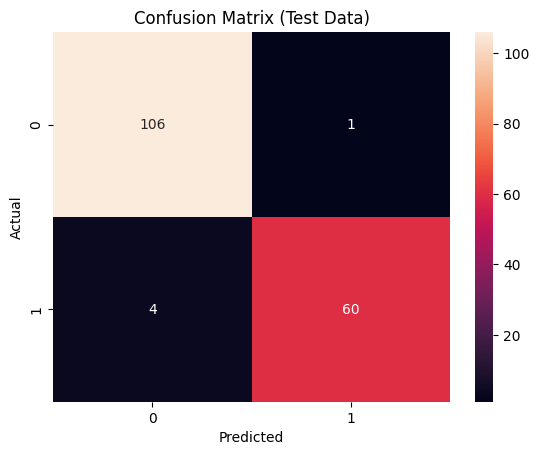

In [36]:
SVM_model = svm.SVC(C = 1, kernel = 'rbf')
SVM_model = SVM_model.fit(X_train, y_train)

y_test_pred = SVM_model.predict(X_test)

display_confusion_matrix(y_test, y_test_pred)

### ROC Curve

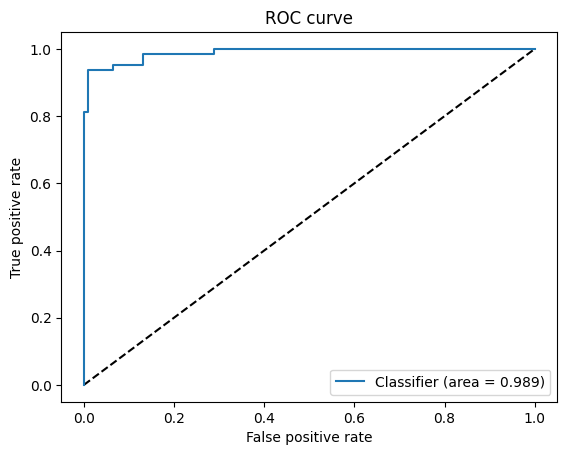

In [37]:
SVM_model = svm.SVC(C = 1, kernel = 'rbf', probability=True)
SVM_model = SVM_model.fit(X_train, y_train)

y_test_pred = SVM_model.predict_proba(X_test)[:, 1]

display_roc_curve(y_test, y_test_pred)

## Summary of results
After optimization of all models, the best performing Classifier that gives the lowest False Positives and False Negatives is SVC model. They have the highest F1 score of 0.96 amongst others. 

## End of Notebook